In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import timeit
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import ops
import keras_hub


import gc
import tensorflow as tf
from keras import backend as K

from ipywidgets import interact, FloatSlider
import ipywidgets as widgets
import matplotlib.image as mpimg

from sam_tools import show_mask, inference_resizing

/home/pgliwny/miniconda3/envs/cv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
2026-01-05 21:04:56.323888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767643496.437877    6460 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767643496.472814    6460 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767643496.713944    6460 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767643496.713976    6460 com

In [2]:
def select_points_on_image(image_path):
    image = mpimg.imread(image_path)
    points = []
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image)
    ax.set_title('Kliknij aby dodać punkt | Prawy przycisk - usuń najbliższy')
    
    def onclick(event):
        if event.inaxes != ax:
            return
        
        x, y = event.xdata, event.ydata
        
        if event.button == 1:  # Lewy przycisk - dodaj
            points.append((x, y))
            ax.plot(x, y, 'ro', markersize=8)
            print(f"Dodano punkt {len(points)}: ({x:.1f}, {y:.1f})")
        
        elif event.button == 3 and points:  # Prawy przycisk - usuń
            distances = [np.sqrt((px - x)**2 + (py - y)**2) for px, py in points]
            idx = np.argmin(distances)
            removed = points.pop(idx)
            print(f"Usunięto punkt: ({removed[0]:.1f}, {removed[1]:.1f})")
            
            # Przerysuj wszystkie punkty
            ax.clear()
            ax.imshow(image)
            for px, py in points:
                ax.plot(px, py, 'ro', markersize=8)
        
        fig.canvas.draw()
    
    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    
    return points

In [3]:
%matplotlib widget  

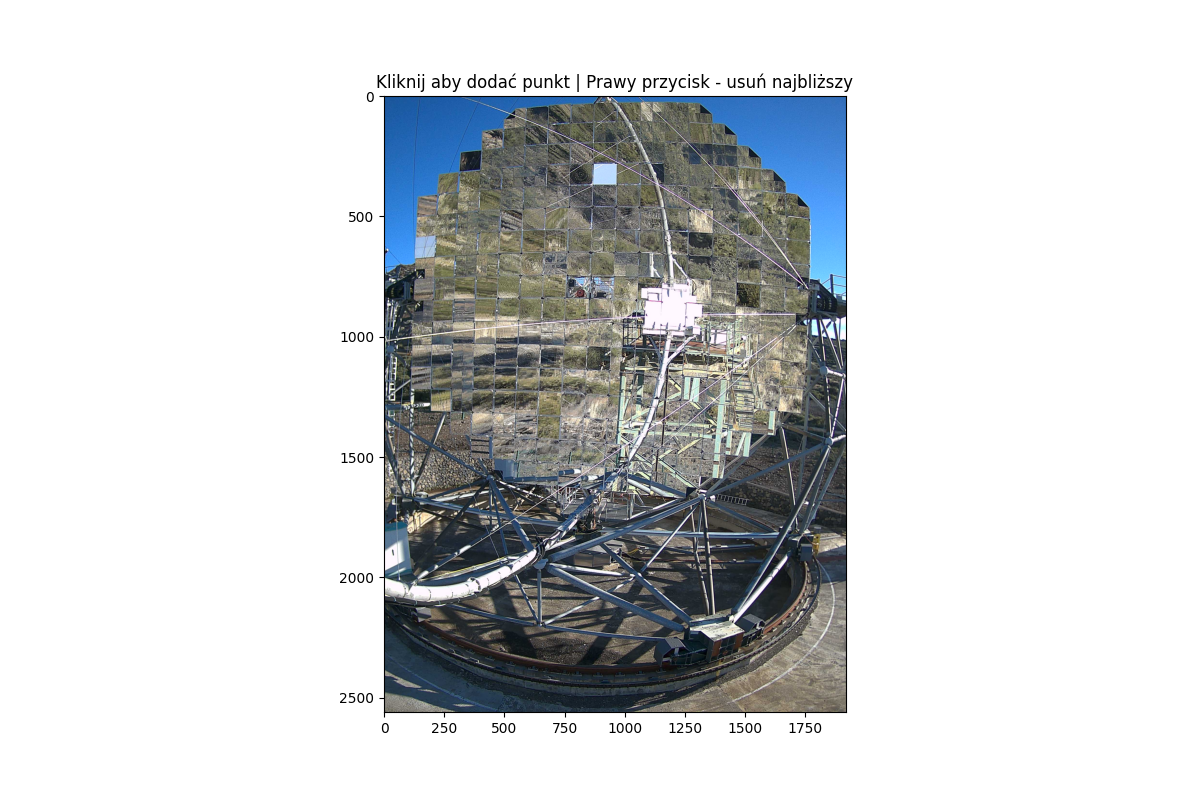


Wszystkie punkty: []


In [4]:
# Użycie:
punkty = select_points_on_image("../data/data/2025/12/26/IRCamM1T20251226_164738M.jpg")
print(f"\nWszystkie punkty: {punkty}")

In [10]:
print(f"\nWszystkie punkty: {punkty}")


Wszystkie punkty: [(np.float64(506.5129870129872), np.float64(312.01953124999955)), (np.float64(573.0064935064938), np.float64(295.39615462662323)), (np.float64(506.5129870129872), np.float64(349.42212865259717)), (np.float64(651.9675324675327), np.float64(436.6947925121749)), (np.float64(776.6428571428573), np.float64(378.5129743303569))]


In [ ]:
def show_image(path):
    # Load our image
    image = np.array(keras.utils.load_img(path))
    image = inference_resizing(image)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(ops.convert_to_numpy(image) / 255.0)
    plt.axis("on")
    plt.show()